# Load Liputan 6 Dataset

In [33]:
!pip install -q datasets transformers seaborn matplotlib wordcloud pandas

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!tar -xzf /content/drive/MyDrive/BootcampAI_data/liputan6_data.tar.gz -C /content --wildcards '*/canonical/*'

In [5]:
from datasets import load_dataset

# Replace "<path/to/uncompressed_folder>" with the actual path to the dataset directory
dataset = load_dataset("id_liputan6", "canonical", data_dir="/content/liputan6_data", trust_remote_code=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating validation split:   0%|          | 0/10972 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10972 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/193883 [00:00<?, ? examples/s]

In [6]:
import pandas as pd

# Convert the dataset splits to pandas DataFrames
train_df = pd.DataFrame(dataset['train'])
validation_df = pd.DataFrame(dataset['validation'])
test_df = pd.DataFrame(dataset['test'])


In [34]:
print(train_df.head())

      id                                                url  \
0  26408  https://www.liputan6.com/news/read/26408/pbb-s...   
1  26410  https://www.liputan6.com/news/read/26410/pesta...   
2  26411  https://www.liputan6.com/news/read/26411/pk-be...   
3  26412  https://www.liputan6.com/news/read/26412/situa...   
4  26413  https://www.liputan6.com/news/read/26413/ratus...   

                                       clean_article  \
0  Liputan6.com, Ambon: Partai Bulan Bintang wila...   
1  Liputan6.com, Denpasar: Berbeda dengan sebagia...   
2  Liputan6.com, Jakarta: Partai Keadilan berteka...   
3  Liputan6.com, Jakarta: Sekitar Rumah Makan Aya...   
4  Liputan6.com, Jambi: Ratusan hektare sawah dik...   

                                       clean_summary  \
0  Konflik Ambon telah berlangsung selama tiga ta...   
1  Masyarakat Bali merayakan Tahun Baru dengan tr...   
2  Partai Keadilan menargetkan tambahan sejuta pe...   
3  Pascaledakan granat di depan Rumah Makan Ayam ...   
4  B

In [8]:
# Summary Statistic

print(train_df.describe())



            id                                                url  \
count   193883                                             193883   
unique  193883                                             193883   
top      26408  https://www.liputan6.com/news/read/26408/pbb-s...   
freq         1                                                  1   

                                            clean_article  \
count                                              193883   
unique                                             193012   
top     Liputan6.com, Jakarta: Di hari perdagangan ter...   
freq                                                    3   

                                            clean_summary  \
count                                              193883   
unique                                             192775   
top     Jumat (7/9), genap tiga tahun kematian aktivis...   
freq                                                    4   

                                       ext

📝 **Exploratory Data Analysis Notes:**

**1. Data Completeness** 📊
- Each column (`id`, `url`, `clean_article`, `clean_summary`, `extractive_summary`) in our dataset have 193,883 entries, evidencing no missing data.

**2. Duplicate entries** 🔍
- The uniqueness of the `id` and `url` in every entry reaffirms their roles as perfect identifiers within our dataset. However, slight repetitions in `clean_article`, `clean_summary`, and `extractive_summary` suggest some duplications.

In [9]:
print(validation_df.describe())

           id                                                url  \
count   10972                                              10972   
unique  10972                                              10972   
top         1  https://www.liputan6.com/news/read/1/batas-pen...   
freq        1                                                  1   

                                            clean_article  \
count                                               10972   
unique                                              10961   
top     Liputan6.com, Jakarta: Di masyarakat, televisi...   
freq                                                    4   

                                            clean_summary  \
count                                               10972   
unique                                              10958   
top     Dua pengedar narkoba disidangkan di PN Jakpus....   
freq                                                    2   

                                       extracti

In [10]:
print(test_df.describe())

           id                                                url  \
count   10972                                              10972   
unique  10972                                              10972   
top     13019  https://www.liputan6.com/news/read/13019/kapol...   
freq        1                                                  1   

                                            clean_article  \
count                                               10972   
unique                                              10970   
top     Liputan6.com, Medan: Menteri Koordinator Bidan...   
freq                                                    2   

                                            clean_summary  \
count                                               10972   
unique                                              10967   
top     Pimpinan DPRD, Ketua PAN, dan Bupati Aceh Timu...   
freq                                                    2   

                                       extracti

After the data is loaded, we can see that:
*   The data columns are: id, url, clean_article, clean_summary, extractive_summary
*   There are 193,383 training data, 10,972 validation data, and 10,972 test data
*   ID and URL is indeed unique identifier
*   clean_article, clean_summary and extractive summary have some minor duplications, we will have a look and then decide if this is ignorable


In [11]:
# see sample duplicate data

import random

# Find duplicates in the 'clean_article' column
duplicates = train_df[train_df.duplicated('clean_article', keep=False)]

# Group by 'clean_article' and collect the groups into a list
grouped_duplicates = [group for name, group in duplicates.groupby('clean_article') if len(group) > 1]

# Randomly sample a few groups to display, for example, 3 groups
sampled_groups = random.sample(grouped_duplicates, 3)

# Display each group
for i, group in enumerate(sampled_groups, start=1):
    print(f"Group {i}:")
    print(group)
    print("\n" + "-"*80 + "\n")  # Just adding a separator for readability


Group 1:
            id                                                url  \
95962   170347  https://www.liputan6.com/news/read/170347/dbd-...   
115342  196810  https://www.liputan6.com/news/read/196810/dbd-...   

                                            clean_article  \
95962   Liputan6.com, Depok: Demam berdarah dengue ali...   
115342  Liputan6.com, Depok: Demam berdarah dengue ali...   

                                            clean_summary  \
95962   Sepanjang Desember ini hampir seratus pasien m...   
115342  Sepanjang Desember ini, hampir seratus pasien ...   

                                       extractive_summary  
95962   Di Rumah Sakit Sentra Medika, Cimanggis, misal...  
115342  Di Rumah Sakit Sentra Medika, Cimanggis, misal...  

--------------------------------------------------------------------------------

Group 2:
            id                                                url  \
88505   160454  https://www.liputan6.com/news/read/160454/bus-...   
10917

## Duplicate Data Analysis

After manual comparation, it is clear that the article is indeed the same albeit different URL and id in the dataset. Since the article is the same, then it is indeed correct that the clean_summary and extractive_summary is also the same.

From this finding, it's safe to proceed without the need to remove duplicate data

# Exploratory Data Analysis

## Text Length Analysis

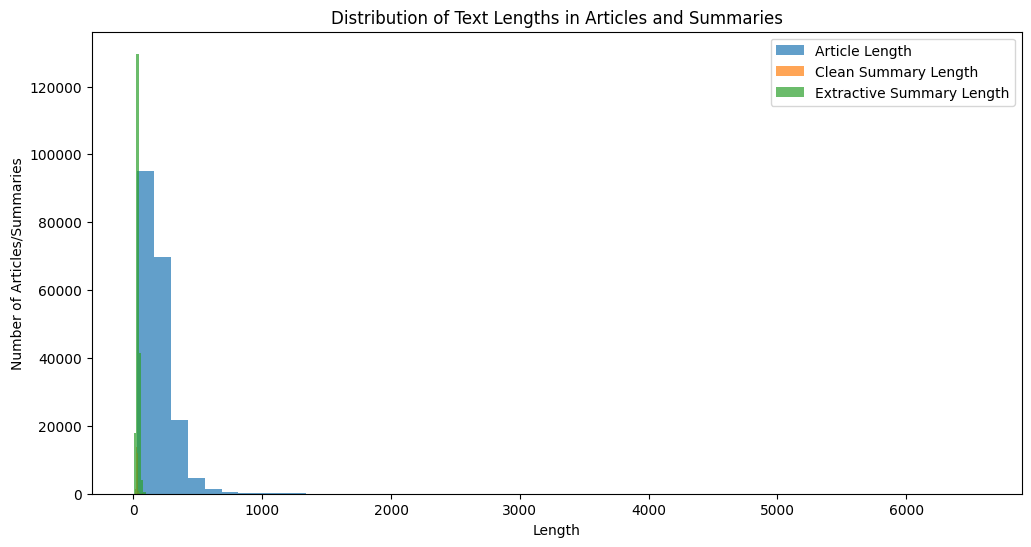

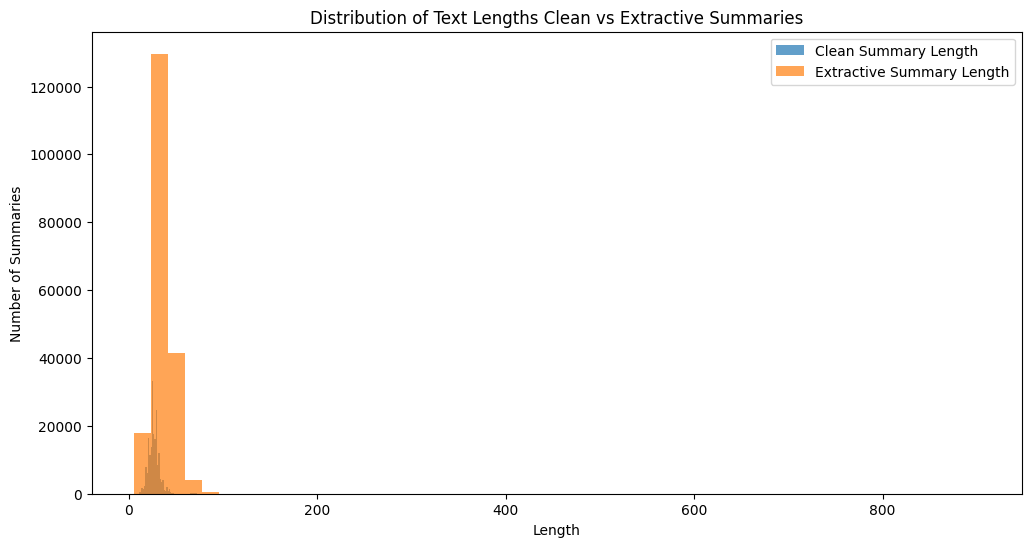

In [13]:
train_df['article_length'] = train_df['clean_article'].apply(lambda x: len(x.split()))
train_df['clean_summary_length'] = train_df['clean_summary'].apply(lambda x: len(x.split()))
train_df['extractive_summary_length'] = train_df['extractive_summary'].apply(lambda x: len(x.split()))

# Plotting all data
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.hist(train_df['article_length'], bins=50, alpha=0.7, label='Article Length')
plt.hist(train_df['clean_summary_length'], bins=50, alpha=0.7, label='Clean Summary Length')
plt.hist(train_df['extractive_summary_length'], bins=50, alpha=0.7, label='Extractive Summary Length')
plt.legend()
plt.title('Distribution of Text Lengths in Articles and Summaries')
plt.xlabel('Length')
plt.ylabel('Number of Articles/Summaries')
plt.show()

# Plotting Clean vs Extractive Summaries
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.hist(train_df['clean_summary_length'], bins=50, alpha=0.7, label='Clean Summary Length')
plt.hist(train_df['extractive_summary_length'], bins=50, alpha=0.7, label='Extractive Summary Length')
plt.legend()
plt.title('Distribution of Text Lengths Clean vs Extractive Summaries')
plt.xlabel('Length')
plt.ylabel('Number of Summaries')
plt.show()


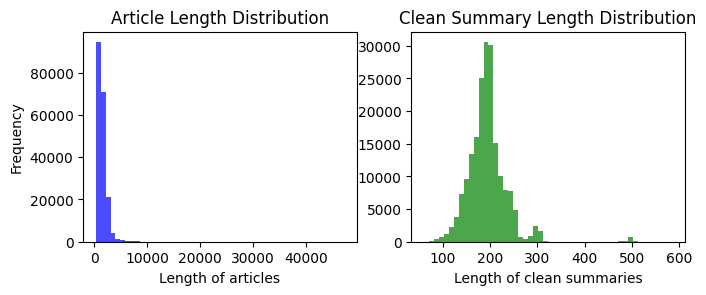

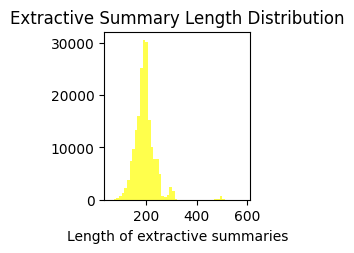

In [18]:
import matplotlib.pyplot as plt

# Calculate the length of articles and summaries
train_df['article_length'] = train_df['clean_article'].apply(len)
train_df['clean_summary_length'] = train_df['clean_summary'].apply(len)
train_df['extractive_summary_length'] = train_df['clean_summary'].apply(len)

# Plot the distribution of text lengths
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.hist(train_df['article_length'], bins=50, color='blue', alpha=0.7)
plt.title('Article Length Distribution')
plt.xlabel('Length of articles')
plt.ylabel('Frequency')

plt.subplot(2, 3, 2)
plt.hist(train_df['clean_summary_length'], bins=50, color='green', alpha=0.7)
plt.title('Clean Summary Length Distribution')
plt.xlabel('Length of clean summaries')
plt.show()

plt.subplot(2, 3, 3)
plt.hist(train_df['extractive_summary_length'], bins=50, color='yellow', alpha=0.7)
plt.title('Extractive Summary Length Distribution')
plt.xlabel('Length of extractive summaries')
plt.show()


The histogram shows the distribution of text lengths for articles, clean summaries and extractive summaries. Some gained insights:

1. **Article Length**:
   - The majority of articles are below 500 words, this is typical news article length
   - Longer articles are not common in the dataset.
   - The distribution is heavily skewed to the right, showing that while most articles are short, there is a long tail of articles with a wide range of lengths.

2. **Clean vs Extractive Summaries**:
   - Clean Summaries have more varied lengths, indicating it is manually crafted to tailor content based on article.
   - Extractive Summaries have more similar or unison in variety, indicating that it's produced by some strict standard or machine-generated.

## Word Cloud Analysis

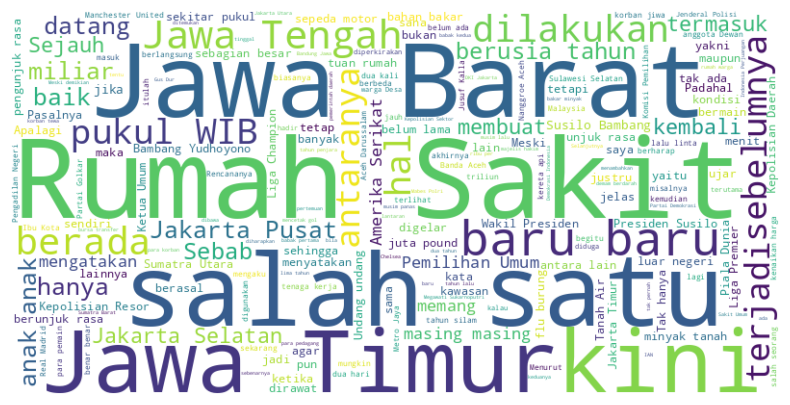

In [28]:
# @title word cloud clean_article
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Start with the default set of stopwords provided by WordCloud
custom_stopwords = set(STOPWORDS)

# Add custom Indonesian stopwords
indonesian_stopwords = [
    "dengan", "pada", "ke", "dari", "dalam", "untuk", "tidak", "juga", "adalah", "yang",
    "ia", "kamu", "kita", "mereka", "dia", "kami", "anda", "ternyata", "tapi", "karena",
    "bisa", "dapat", "harus", "ingin", "akan", "Rp", "hingga", "kini,", "bahkan", "sedangkan",
    "itu", "ini", "sangat", "lebih", "masih", "serta", "atau", "namun", "setelah",
    "merupakan", "beberapa", "orang", "saja", "saat", "selain", "seperti", "semua",
    "Tim", "Liputan6", "Liputan", "SCTV", "di", "dan", "itu", "ini", "sementara"
]

custom_stopwords.update(indonesian_stopwords)

text = " ".join(article for article in train_df['clean_article'])

# Generate the word cloud considering the extended stopwords
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords).generate(text)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


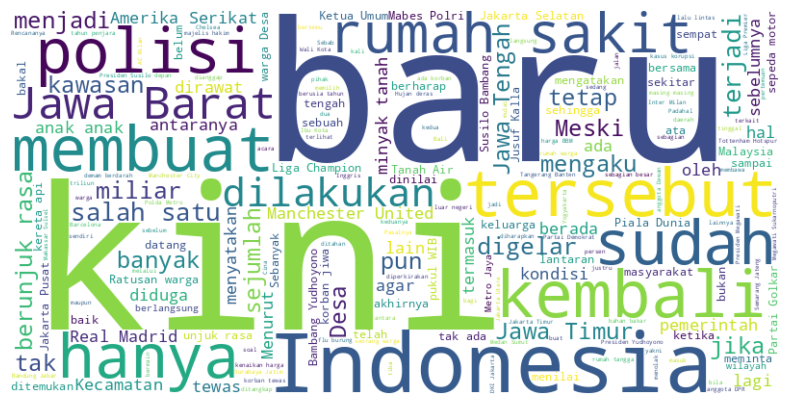

In [20]:
# @title word cloud clean_summary
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Start with the default set of stopwords provided by WordCloud
custom_stopwords = set(STOPWORDS)

# Add custom Indonesian stopwords including your specific words
indonesian_stopwords = [
    "dengan", "pada", "ke", "dari", "dalam", "untuk", "tidak", "juga", "adalah", "yang",
    "ia", "kamu", "kita", "mereka", "dia", "kami", "anda", "ternyata", "tapi", "karena",
    "bisa", "dapat", "harus", "ingin", "akan", "Rp", "hingga", "kini,", "bahkan", "sedangkan",
    "itu", "ini", "sangat", "lebih", "masih", "serta", "atau", "namun", "setelah",
    "merupakan", "beberapa", "orang", "saja", "saat", "selain", "seperti", "semua",
    "Tim", "Liputan6", "Liputan", "SCTV", "di", "dan", "itu", "ini", "sementara"
]

custom_stopwords.update(indonesian_stopwords)

text = " ".join(article for article in train_df['clean_summary'])

# Generate the word cloud considering the extended stopwords
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords).generate(text)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


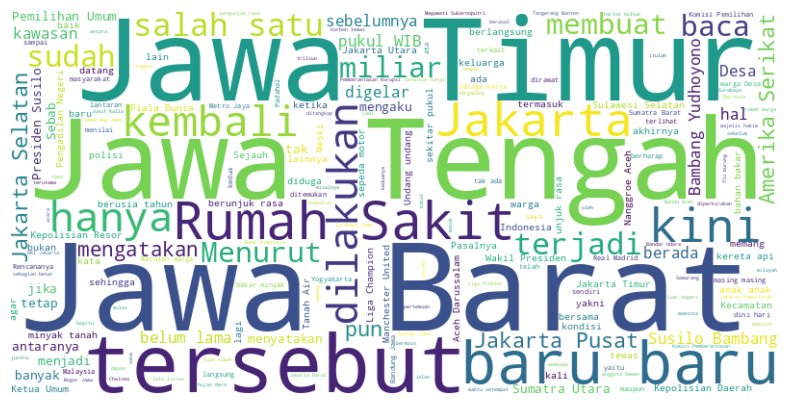

In [21]:
# @title word cloud extractive_summary
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Start with the default set of stopwords provided by WordCloud
custom_stopwords = set(STOPWORDS)

# Add custom Indonesian stopwords including your specific words
indonesian_stopwords = [
    "dengan", "pada", "ke", "dari", "dalam", "untuk", "tidak", "juga", "adalah", "yang",
    "ia", "kamu", "kita", "mereka", "dia", "kami", "anda", "ternyata", "tapi", "karena",
    "bisa", "dapat", "harus", "ingin", "akan", "Rp", "hingga", "kini,", "bahkan", "sedangkan",
    "itu", "ini", "sangat", "lebih", "masih", "serta", "atau", "namun", "setelah",
    "merupakan", "beberapa", "orang", "saja", "saat", "selain", "seperti", "semua",
    "Tim", "Liputan6", "Liputan", "SCTV", "di", "dan", "itu", "ini", "sementara"
]

custom_stopwords.update(indonesian_stopwords)

text = " ".join(article for article in train_df['extractive_summary'])

# Generate the word cloud considering the extended stopwords
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords).generate(text)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Word Cloud Insights

*   The main keyword that is relevant across articles and summaries is "Rumah Sakit". The fact that it is pretty consistent meaning that the summaries are relevant.
*   There are also geo keywords such as Jawa Barat, Jawa Tengah and Jawa Timur that are the highlights

> Another observations is how word cloud of extractive summaries are more consistent with word cloud of the article, where in clean summaries the word cloud is quite different. **This could be an indication that extractive summaries here are better at representing the content of the articles**







## Word Frequency Analysis

In [22]:
!pip install -q nlp-id

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 36.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.5/320.5 kB 34.1 MB/s eta 0:00:00


In [34]:
from collections import Counter
from nlp_id.stopword import StopWord

# Initialize the stopword remover from nlp-id
stopword_remover = StopWord()

def get_most_common_words(text, num_top_words=20):
    words = " ".join(text).split()
    # Assuming we directly access the list of stopwords if the attribute is available, e.g., stopword_remover.stopwords
    stopwords = stopword_remover.stopwords  # This should be confirmed by checking the actual attribute in nlp_id
    filtered_words = [word for word in words if word not in stopwords]
    common_words = Counter(filtered_words).most_common(num_top_words)
    return common_words

# Example usage with your dataset
common_words_articles = get_most_common_words(train_df['clean_article'])
common_words_summaries = get_most_common_words(train_df['clean_summary'])

print("Most Common Words in Articles:", common_words_articles)
print("Most Common Words in Summaries:", common_words_summaries)


Most Common Words in Articles: [('Liputan6.com,', 168939), ('tak', 124425), ('warga', 93860), ('[baca:', 84743), ('itu,', 74566), ('Rp', 71346), ('hingga', 69254), ('Jawa', 66555), ('rumah', 65933), ('Jakarta:', 64261), ('Jakarta', 60963), ('ini.', 57866), ('Di', 57696), ('ini,', 57548), ('Indonesia', 57268), ('Menurut', 57162), ('korban', 54322), ('Mereka', 53161), ('orang', 52419), ('tim', 48203)]
Most Common Words in Summaries: [('tak', 19519), ('warga', 17337), ('rumah', 12267), ('korban', 11104), ('Jakarta', 10335), ('Rp', 10203), ('hingga', 9569), ('Mereka', 9160), ('Indonesia', 9072), ('Jawa', 8593), ('orang', 8591), ('Presiden', 8506), ('Kota', 8042), ('anggota', 7808), ('akibat', 7062), ('Di', 6650), ('mengaku', 6643), ('pemerintah', 6356), ('kawasan', 6133), ('ini.', 6093)]


**Word Frequency Analysis**


*   **Geographical Focus**: Words like 'Jakarta', 'Jawa', and 'Indonesia' highlight a strong geographical focus in the content. This could indicate region-specific news or issues being prominently covered.
*   **Social and Economic Elements**: Terms like 'warga' (residents), 'rumah' (home), 'korban' (victim), and 'Rp' (Indonesian Rupiah) suggest frequent discussion of social issues, economic topics, or incidents affecting people directly.
*   **Recurring Content Types**: The appearance of terms like '[baca:' (read:) might indicate recurrent formatting or template phrases in articles, which might need special handling or removal during preprocessing for text summarization.

## Summary-to-Article Ratio

In [36]:
# Calculate the compression ratio
train_df['compression_ratio'] = train_df['extractive_summary_length'] / train_df['article_length']

# Average compression ratio
average_compression = train_df['compression_ratio'].mean()
print(f"Average Summary-to-Article Compression Ratio: {average_compression:.2f}")


Average Summary-to-Article Compression Ratio: 0.17


On average, the summaries are only 17% as long as their corresponding articles. This compression ratio of 0.17 suggests that the summaries are significantly more concise than the full articles, condensing the content down to just a fraction of the original length. This high level of compression indicates that the summaries are designed to be very brief, giving readers the essence of the articles quickly.

## N-Gram Analysis

N-grams (bigrams, trigrams) analysis can help in understanding the context around common words, which is important for training summarization models that need to capture semantic meanings rather than just keyword spotting.

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from nlp_id.stopword import StopWord

# Initialize the stopword remover
stopword_remover = StopWord()

def get_top_ngrams(corpus, n=None, ngrams=2, top_k=10):
    # Accessing the stopwords directly
    vec = CountVectorizer(ngram_range=(ngrams, ngrams), stop_words=stopword_remover.stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:top_k]

# Example usage with bigrams
top_bigrams = get_top_ngrams(train_df['clean_article'], ngrams=2, top_k=10)
print("Top Bigrams in Articles:", top_bigrams)

# Example usage with trigrams
top_trigrams = get_top_ngrams(train_df['clean_article'], ngrams=3, top_k=10)
print("Top Trigrams in Articles:", top_trigrams)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'batas', 'benarnya', 'bener', 'berulang', 'dalamnya', 'dibagi', 'galanya', 'gamblangnya', 'gini', 'gininya', 'harinya', 'kesini', 'kurangnya', 'mata', 'menerus', 'mereta', 'merta', 'musabab', 'musababnya', 'napa', 'nyata', 'olah', 'ratanya', 'reka', 'rupa', 'sebenar', 'sedalam', 'segamblang', 'segini', 'segmen', 'sejelas', 'sekurang', 'sempet', 'tama', 'yakinnya'] not in stop_words.
  warnings.warn(


Top Bigrams in Articles: [('liputan6 com', 169503), ('com jakarta', 63358), ('liputan sctv', 37137), ('tim liputan', 36170), ('rumah sakit', 27164), ('jawa barat', 23587), ('jawa timur', 20454), ('jakarta pusat', 13190), ('anak anak', 12420), ('jakarta selatan', 11682)]
Top Trigrams in Articles: [('liputan6 com jakarta', 63164), ('tim liputan sctv', 35894), ('susilo bambang yudhoyono', 9666), ('presiden susilo bambang', 6956), ('nanggroe aceh darussalam', 5373), ('dirawat rumah sakit', 5061), ('bahan bakar minyak', 4720), ('partai demokrasi indonesia', 4600), ('bandung jawa barat', 4439), ('demokrasi indonesia perjuangan', 4404)]


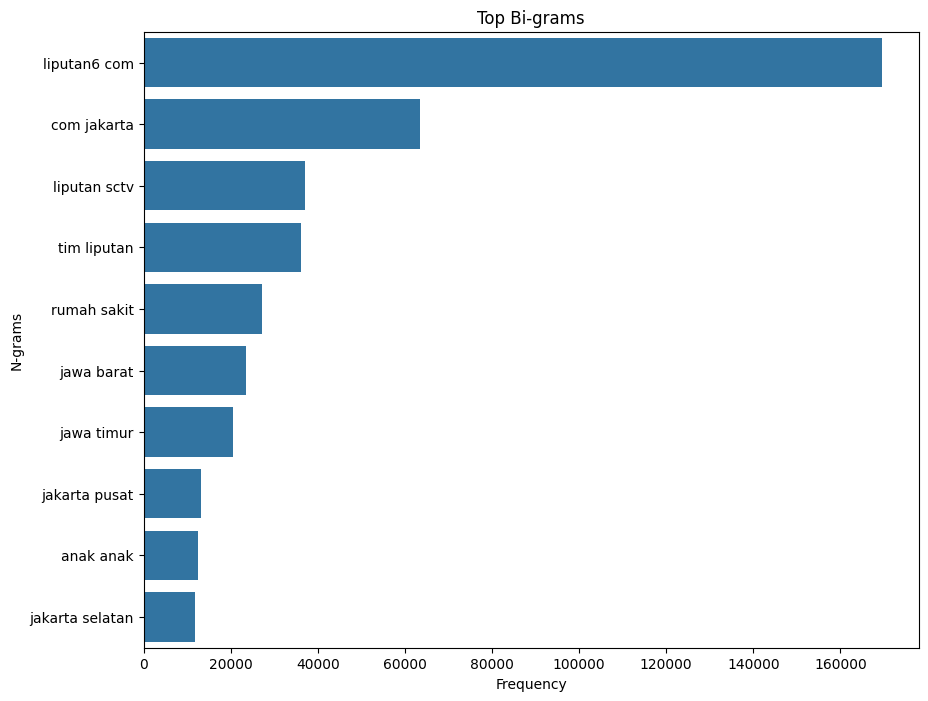

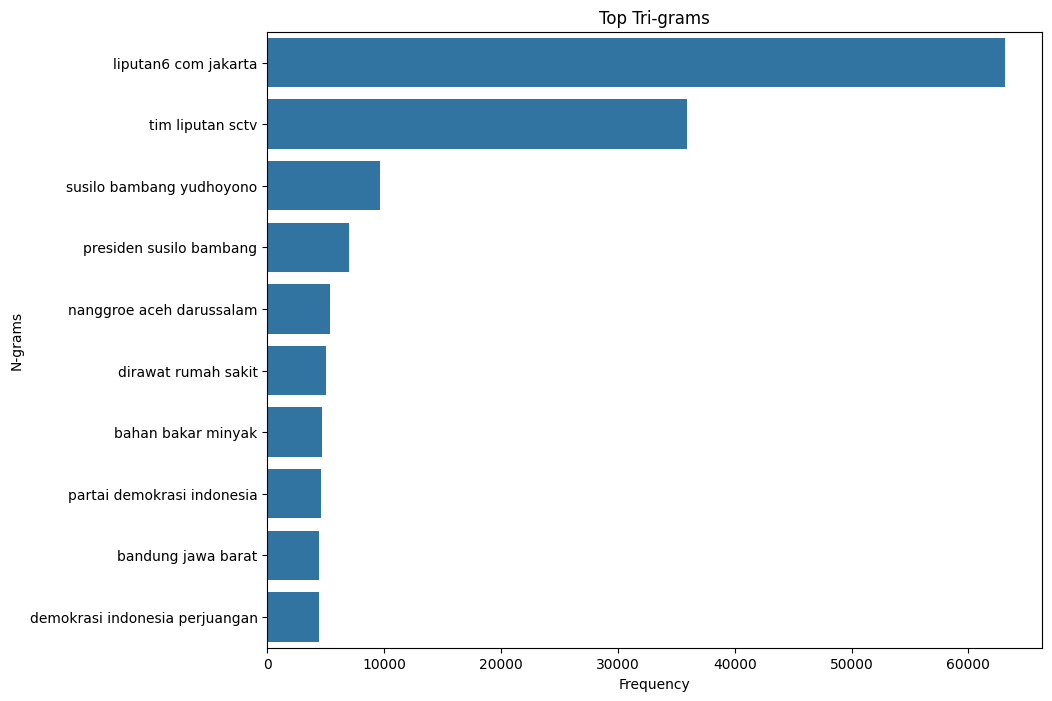

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_ngrams(top_ngrams, title='Top N-grams'):
    # Unzip the tuples to separate words and counts
    words, counts = zip(*top_ngrams)

    # Create the plot
    plt.figure(figsize=(10, 8))
    sns.barplot(x=list(counts), y=list(words))
    plt.xlabel('Frequency')
    plt.ylabel('N-grams')
    plt.title(title)
    plt.show()

# Plot bigrams
plot_ngrams(top_bigrams, 'Top Bi-grams')

# Plot trigrams
plot_ngrams(top_trigrams, 'Top Tri-grams')

# BERT Training

## Tokenize Dataset

In [37]:
from transformers import AutoTokenizer

# Assuming you are using an IndoBERT model; adjust the model name as necessary
model_name = "indobenchmark/indobert-base-p1"
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize_function(examples):
    # Prepare the text and summary from the dataset for tokenization
    model_inputs = tokenizer(examples['clean_article'], padding="max_length", truncation=True, max_length=512)

    # Now, prepare the summaries (targets) for tokenization
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(examples['clean_summary'], padding="max_length", truncation=True, max_length=128)

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs


# Tokenize the whole dataset
tokenized_datasets = dataset.map(tokenize_function, batched=True)


Map:   0%|          | 0/10972 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3946: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


## Sentence Embedding

In [38]:
!pip install -q transformers scikit-learn

In [39]:
from transformers import AutoModel
import torch
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [40]:
model = AutoModel.from_pretrained(model_name)

def get_sentence_embeddings(article_text):
    sentences = sent_tokenize(article_text)
    sentence_embeddings = []

    for sentence in sentences:
        inputs = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True, max_length=128)
        outputs = model(**inputs)
        cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().detach().numpy()
        sentence_embeddings.append(cls_embedding)

    return sentences, np.array(sentence_embeddings)


In [41]:
def select_top_sentences(article_text, num_sentences=3):
    sentences, embeddings = get_sentence_embeddings(article_text)
    doc_embedding = np.mean(embeddings, axis=0).reshape(1, -1)
    similarities = cosine_similarity(doc_embedding, embeddings).flatten()
    selected_indices = np.argsort(similarities)[-num_sentences:]
    selected_sentences = [sentences[i] for i in selected_indices]
    # Return the summary, which is composed of the selected sentences
    return " ".join(selected_sentences)


In [42]:
# Example: Apply summarization to the first article in the train_df
sample_article = train_df.iloc[0]['clean_article']
sample_summary = train_df.iloc[0]['extractive_summary']
summary = select_top_sentences(sample_article, num_sentences=3)
print("Original Article:", sample_article)
print("Original Summary:", sample_summary)
print("\nGenerated Summary:", summary)


Original Article: Liputan6.com, Ambon: Partai Bulan Bintang wilayah Maluku bertekad membantu pemerintah menyelesaikan konflik di provinsi tersebut. Syaratnya, penanganan penyelesaian konflik Maluku harus dimulai dari awal kerusuhan, yakni 19 Januari 1999. Demikian hasil Musyawarah Wilayah I PBB Maluku yang dimulai Sabtu pekan silam dan berakhir Senin (31/12) di Ambon. Menurut seorang fungsionaris PBB Ridwan Hasan, persoalan di Maluku bisa selesai asalkan pemerintah dan aparat keamanan serius menangani setiap persoalan di Maluku secara komprehensif dan bijaksana. Itulah sebabnya, PBB wilayah Maluku akan menjadikan penyelesaian konflik sebagai agenda utama partai. PBB Maluku juga akan mendukung penegakan hukum secara terpadu dan tanpa pandang bulu. Siapa saja yang melanggar hukum harus ditindak. Ridwan berharap, Ketua PBB Maluku yang baru, Ali Fauzi, dapat menindak lanjuti agenda politik partai yang telah diamanatkan dan mau mendukung penegakan hukum di Maluku. (ULF/Sahlan Heluth).
Origi

In [44]:
!pip install -q rouge_score

In [ ]:
from datasets import load_metric

# Load the rouge metric with trust_remote_code=True to avoid the security prompt
rouge = load_metric("rouge", trust_remote_code=True)

def compute_rouge_scores(predictions, clean_references):
    predictions = [select_top_sentences(article, num_sentences=3) for article in predictions]
    clean_references = [reference for reference in clean_references]

    scores = rouge.compute(predictions=predictions, references=clean_references,
                           rouge_types=["rouge1", "rouge2", "rouge3", "rougeL", "rougeLsum"])

    for key, value in scores.items():
        print(f"{key}: {value.mid.precision:.4f}, {value.mid.recall:.4f}, {value.mid.fmeasure:.4f}")

articles = test_df['clean_article'].tolist()
references = test_df['extractive_summary'].tolist()
compute_rouge_scores(articles, references)


**ROUGE Results**
The ROUGE scores give a quantitative measure of the quality of the summaries generated by your model compared to the reference summaries. Here's an analysis of what these scores imply:

- **ROUGE-1 (0.2182 Precision, 0.3741 Recall, 0.2709 F-measure)**: Measures the overlap of unigrams between the generated and reference summaries. The recall is higher than precision, suggesting that while the generated summaries cover a good portion of the reference content, they might also include extraneous information or be more verbose than necessary.

- **ROUGE-2 (0.0910 Precision, 0.1588 Recall, 0.1145 F-measure)**: Looks at bigrams. These scores are significantly lower than ROUGE-1, indicating that the model struggles more with capturing sequences of two words. This can be a sign of poorer coherence or flow in the generated summaries.

- **ROUGE-3 (0.0355 Precision, 0.0625 Recall, 0.0449 F-measure)**: Assesses the overlap of trigrams. The further drop here underscores challenges in maintaining longer phrase structures, which are crucial for summarizing complex information accurately.

- **ROUGE-L (0.1497 Precision, 0.2491 Recall, 0.1834 F-measure) and ROUGE-Lsum**: These metrics evaluate the longest common subsequences and are good indicators of the overall structural similarity. The moderate scores here suggest that while there is some structural similarity, improvements are needed to enhance the textual coherence and fidelity relative to the human-written summaries.

In [ ]:
# # Use all Test Dataset
# articles = test_df['clean_article'].tolist()
# references = test_df['extractive_summary'].tolist()
# compute_rouge_scores(articles, references)

rouge1: 0.3138, 0.4284, 0.3555
rouge2: 0.2144, 0.2987, 0.2452
rougeL: 0.2589, 0.3551, 0.2939
rougeLsum: 0.2589, 0.3551, 0.2939
